In [1]:
%load_ext autoreload

In [2]:
import random
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

if not "../data_processing" in sys.path:
    sys.path.append("../data_processing")

%autoreload
import build_dataset

ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
appended
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


In [3]:
def train_test_split(df, percentage):
    split_index = int(np.floor(df.shape[0]) * percentage)
    train = df[:split_index]
    test = df[split_index:].reset_index(drop=True)
    return train, test

### Load Datasets

In [4]:
wt1_path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_WTG01.csv'
wt1 = pd.read_csv(wt1_path)

wt2_path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_WTG02.csv'
wt2 = pd.read_csv(wt2_path)

wt3_path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_WTG03.csv'
wt3 = pd.read_csv(wt3_path)

wt4_path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_WTG04.csv'
wt4 = pd.read_csv(wt4_path)


### Process data

In [5]:
# Remove uninteresting columns
wt1_mod = wt1.drop(columns=['ActPower','WindSpeed', 'NacelleDirection'])
wt2_mod = wt2.drop(columns=['ActPower','WindSpeed', 'NacelleDirection','RMS_component_interval'])
wt3_mod = wt3.drop(columns=['ActPower','WindSpeed', 'NacelleDirection'])
wt4_mod = wt4.drop(columns=['ActPower','WindSpeed', 'NacelleDirection'])


# Filter data sets IMPORTANT STEP
wt1_mod = wt1_mod.drop(wt1_mod[wt1_mod.AvgRotSpeed < 1400].index)
wt2_mod = wt2_mod.drop(wt2_mod[wt2_mod.AvgRotSpeed < 1400].index)
wt3_mod = wt3_mod.drop(wt3_mod[wt3_mod.AvgRotSpeed < 1400].index)
wt4_mod = wt4_mod.drop(wt4_mod[wt4_mod.AvgRotSpeed < 1400].index)


# Add target to each data set. Turbine 2 and 3 have target = 0 as they are OK. Tubine 1 has target = 1 as it has 
# faulty behavior. Turbine 4 has target = 2 as it has the most faulty behavior.
wt1_mod.insert(0, 'Target', np.ones(wt1_mod.shape[0]))
wt2_mod.insert(0, 'Target', np.ones(wt2_mod.shape[0])*2)
wt3_mod.insert(0, 'Target', np.ones(wt3_mod.shape[0])*3)
wt4_mod.insert(0, 'Target', np.ones(wt4_mod.shape[0])*4)

In [6]:
wt1_mod.describe()

,Target,AvgPower,AvgRotSpeed,GbxHssRr_RMS_0,GbxHssRr_RMS_1,GbxHssRr_RMS_2,GbxHssRr_RMS_3,GbxHssRr_RMS_4,GbxHssRr_RMS_5,GbxHssRr_RMS_6,...,GbxHssRr_RMS_40,GbxHssRr_RMS_41,GbxHssRr_RMS_42,GbxHssRr_RMS_43,GbxHssRr_RMS_44,GbxHssRr_RMS_45,GbxHssRr_RMS_46,GbxHssRr_RMS_47,GbxHssRr_RMS_48,GbxHssRr_RMS_49
count,309.0,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,1.0,2746.227919,1472.787933,0.546679,0.381662,0.916577,0.826114,1.596481,1.435065,2.221640,...,1.006632,1.525314,1.827857,2.048020,2.711615,2.634467,3.232253,3.077531,1.708070,0.901599
std,0.0,328.816757,25.966161,0.071654,0.082646,0.091482,0.059252,0.660066,0.266407,0.400291,...,0.067150,0.114008,0.169852,0.136324,0.209764,0.204299,0.258769,0.293248,0.183176,0.081543
min,1.0,1613.262939,1407.635620,0.397267,0.287212,0.681021,0.679624,0.826292,1.142547,1.515086,...,0.828790,1.187768,1.420276,1.612345,2.086794,2.125344,2.415363,2.169238,1.292742,0.734339
25%,1.0,2557.692627,1458.375678,0.499882,0.316722,0.856513,0.785493,1.058557,1.241239,1.870796,...,0.968488,1.458581,1.691049,1.966758,2.586281,2.513977,3.082259,2.904488,1.585124,0.833628
50%,1.0,2673.044678,1471.349155,0.529607,0.340775,0.897927,0.821601,1.267865,1.381968,2.244278,...,1.009266,1.532451,1.826249,2.061544,2.706814,2.630532,3.264046,3.111853,1.696483,0.909304
75%,1.0,2974.833740,1488.076691,0.581094,0.438696,0.948843,0.861664,2.191509,1.546936,2.539662,...,1.046981,1.600920,1.946021,2.136219,2.840425,2.758631,3.406560,3.255266,1.807402,0.958912
max,1.0,3314.455811,1605.240025,0.874714,0.627384,1.257461,1.015496,3.265189,2.929682,3.154756,...,1.369334,1.818333,2.257359,2.382299,3.517463,3.401518,4.150285,4.315755,2.753494,1.193085


### Split into training and testing

In [7]:
# Split each turbine data set into training and testing
wt1_train, wt1_test = train_test_split(wt1_mod, 0.5)
wt2_train, wt2_test = train_test_split(wt2_mod, 0.5)
wt3_train, wt3_test = train_test_split(wt3_mod, 0.5)
wt4_train, wt4_test = train_test_split(wt4_mod, 0.5)

In [8]:
# Concatinate training sets from each turbine
train = wt1_train.append(wt2_train, ignore_index=True)
train = train.append(wt3_train, ignore_index=True)
train = train.append(wt4_train, ignore_index=True)

# Concatinate testing sets from each turbine
test = wt1_test.append(wt2_test, ignore_index=True)
test = test.append(wt3_test, ignore_index=True)
test = test.append(wt4_test, ignore_index=True)

# Shuffle training and testing
train_shufled = train.sample(frac=1).reset_index(drop=True)
test_shufled = test.sample(frac=1).reset_index(drop=True)

In [9]:
# Separate features from target
X_train = train.drop(columns='Target')
y_train = train['Target']

X_test = test.drop(columns='Target')
y_test = test['Target']

In [10]:
# Separate features from target
X_train_shuf = train_shufled.drop(columns='Target')
y_train_shuf = train_shufled['Target']

X_test_shuf = test_shufled.drop(columns='Target')
y_test_shuf = test_shufled['Target']

## Random Forest Classifier

In [11]:
clf = RandomForestClassifier(n_estimators=1, max_depth=4)
clf.fit(X_train_shuf, y_train_shuf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
clf.score(X_test_shuf, y_test_shuf)

0.9859154929577465

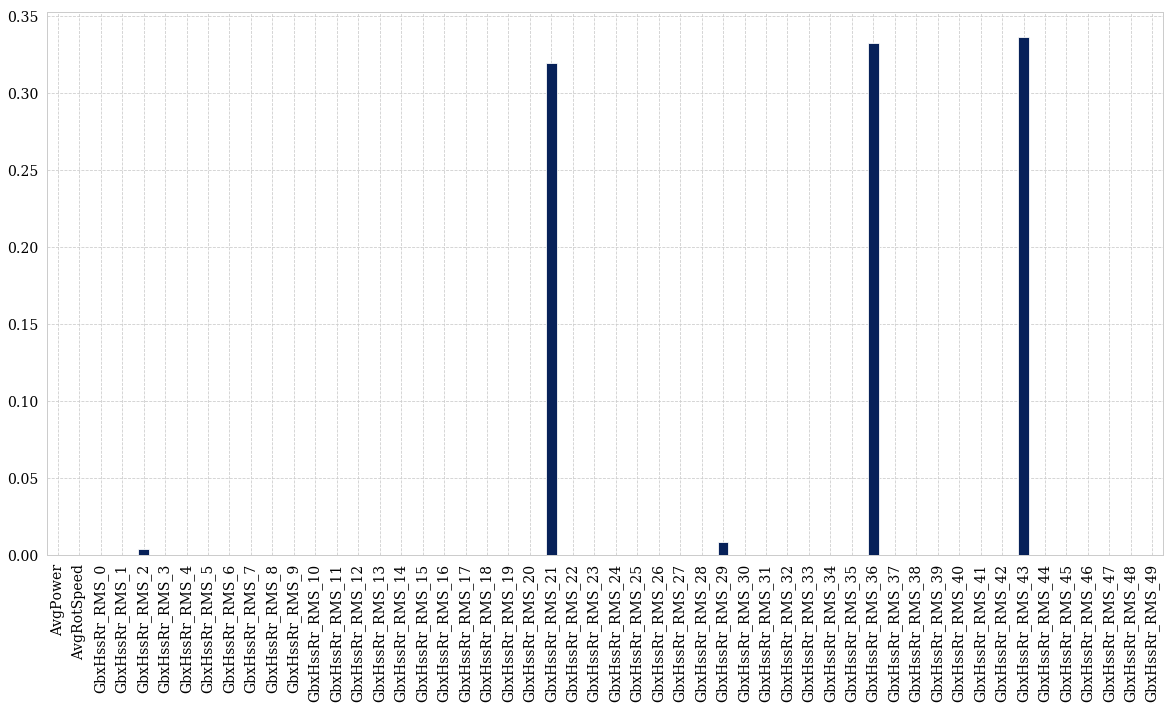

In [13]:
imp = pd.Series(clf.feature_importances_, index=X_train_shuf.columns)
imp.plot.bar(figsize=(20,10))

<Figure size 720x720 with 0 Axes>

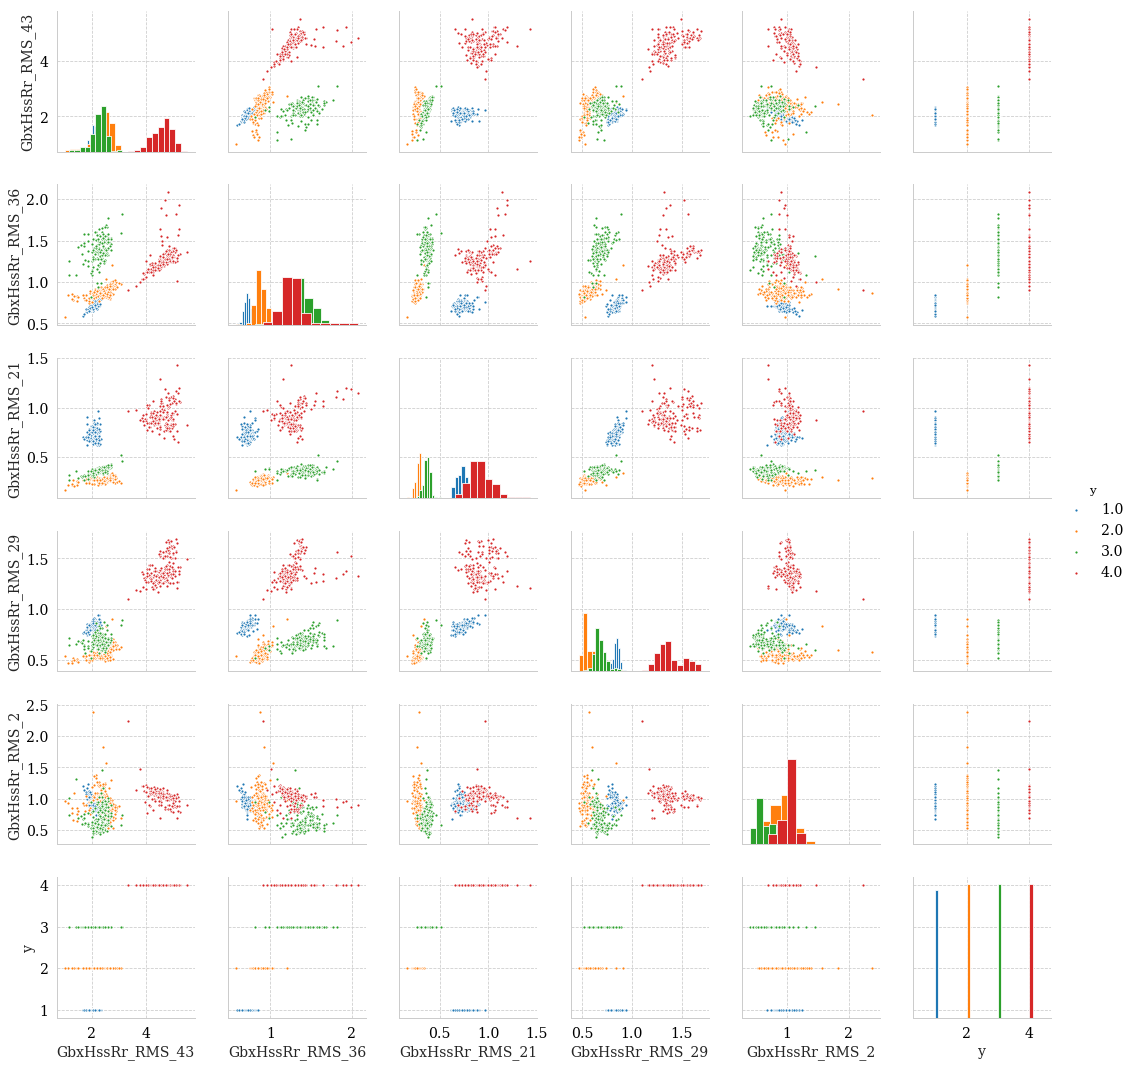

In [14]:
cols = imp.sort_values().index[-5:][::-1]
#cols = [f'GbxHssRr_RMS_{i}' for i in [5,10,15,20,25]]
df = X_train_shuf[cols].copy()
df['y'] = y_train_shuf
plt.figure(figsize=(10, 10))
##sns.scatterplot(x=cols[1], y=cols[0], hue='y', data=df)
sns.pairplot(df, hue='y', diag_kind='hist', palette='tab10')#, plot_kws=dict(s=20))

In [15]:
faults = 0
faulty_pred=[]
for i in range(test_shufled.shape[0]):
    lolX = np.array([test_shufled.drop(columns='Target').iloc[i].drop(columns='Target')])
    target = test_shufled.iloc[i]['Target']
    prediction = clf.predict(lolX)
    #print(f'Interval: {i} \tPredicted: {prediction[0]}  \tTarget: {target}')
    if prediction[0] != target:
        faults += 1
        faulty_pred.append([target, prediction[0]])
print(f'Number of Faults: {faults} \tRatio: {(test_shufled.shape[0]-faults)/test_shufled.shape[0]}')
for list in faulty_pred:
    print(f'Target: {list[0]} \tPredicted: {list[1]}')

Number of Faults: 9 	Ratio: 0.9859154929577465
Target: 1.0 	Predicted: 3.0
Target: 1.0 	Predicted: 3.0
Target: 1.0 	Predicted: 3.0
Target: 1.0 	Predicted: 3.0
Target: 3.0 	Predicted: 2.0
Target: 1.0 	Predicted: 3.0
Target: 1.0 	Predicted: 3.0
Target: 3.0 	Predicted: 2.0
Target: 1.0 	Predicted: 3.0


## Decision Tree

In [16]:
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train_shuf, y_train_shuf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
dt_clf.score(X_test_shuf, y_test_shuf)

1.0

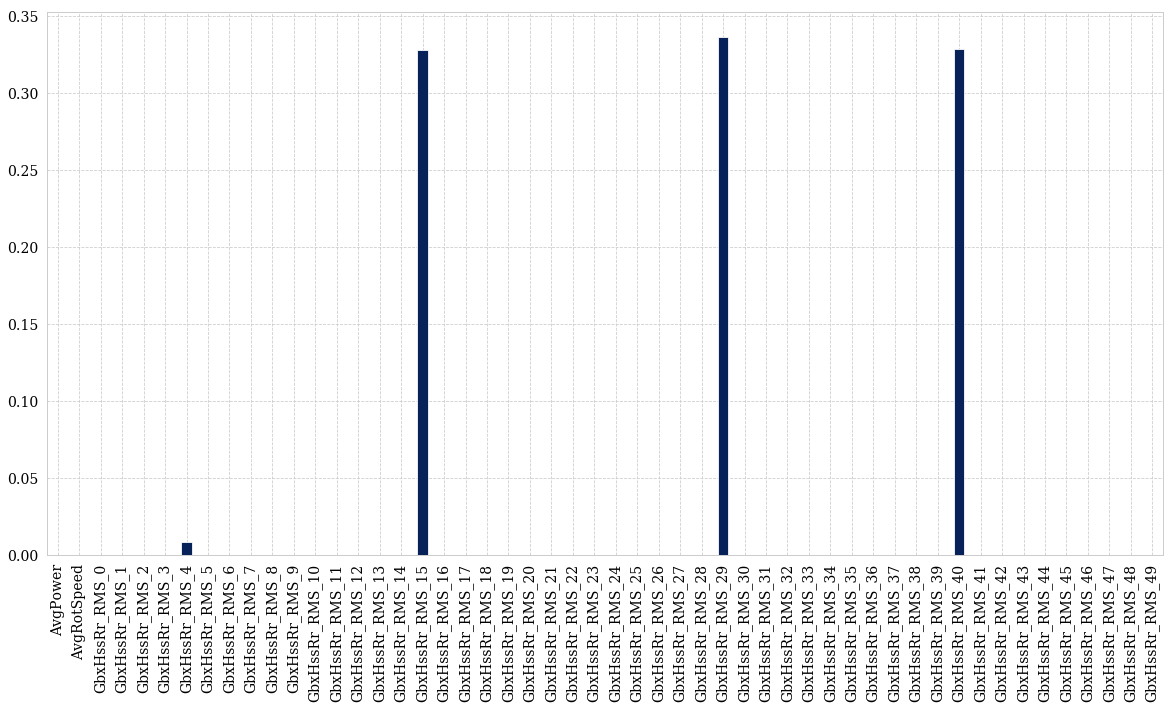

In [18]:
imp = pd.Series(dt_clf.feature_importances_, index=X_train_shuf.columns)
imp.plot.bar(figsize=(20,10))

<Figure size 720x720 with 0 Axes>

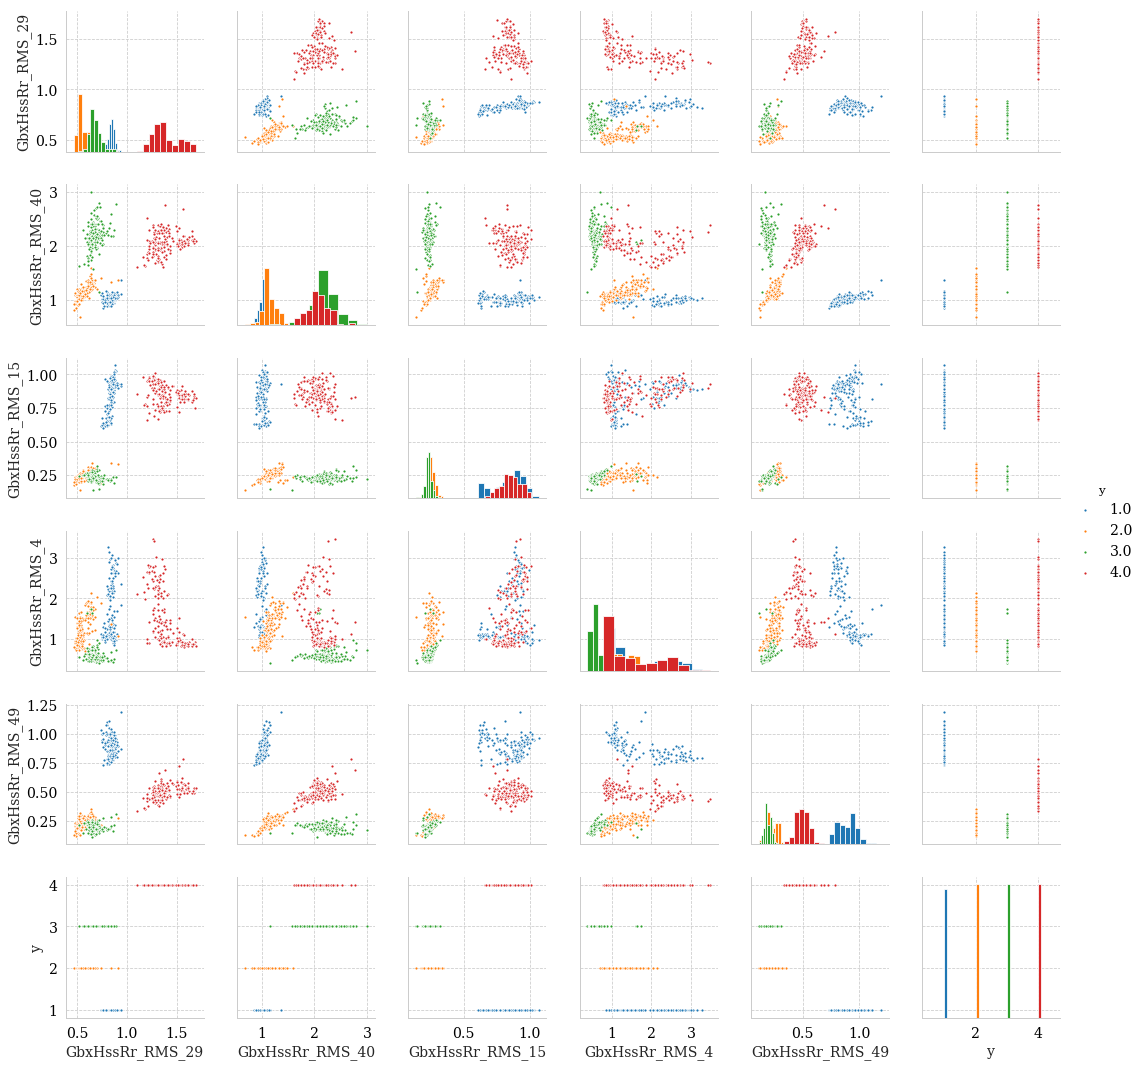

In [23]:
cols = imp.sort_values().index[-5:][::-1]
#cols = [f'GbxHssRr_RMS_{i}' for i in [5,10,15,20,25]]
df = X_train_shuf[cols].copy()
df['y'] = y_train_shuf
plt.figure(figsize=(10, 10))
##sns.scatterplot(x=cols[1], y=cols[0], hue='y', data=df)
sns.pairplot(df, hue='y', diag_kind='hist', palette='tab10')#, plot_kws=dict(s=20))

In [20]:
faults = 0
faulty_pred=[]
for i in range(test_shufled.shape[0]):
    lolX = np.array([test_shufled.drop(columns='Target').iloc[i].drop(columns='Target')])
    target = test_shufled.iloc[i]['Target']
    prediction = dt_clf.predict(lolX)
    #print(f'Interval: {i} \tPredicted: {prediction[0]}  \tTarget: {target}')
    if prediction[0] != target:
        faults += 1
        faulty_pred.append([target, prediction[0]])
print(f'Number of Faults: {faults} \tRatio: {(test_shufled.shape[0]-faults)/test_shufled.shape[0]}')
for list in faulty_pred:
    print(f'Target: {list[0]} \tPredicted: {list[1]}')

Number of Faults: 0 	Ratio: 1.0
